# 1. Data labeling

In [28]:
from numpy import *
from pandas import *
from matplotlib.pyplot import *
from seaborn import *
from datetime import *

import matplotlib
import time

In [32]:
labeling = read_csv("LOG_DATA2.csv")

In [33]:
labeling.head(5) # Cheking data

,MASTERLOG_ID,MSG_DATETIME,MSG_STATUS,HUB_CNT,SPOKE_CNT,RECV_HUB_CNT,RECV_SPOKE_CNT,ERROR_TYPE,ERROR_CNT,REASON_CODE,...,COMPRESS_SIZE,SOURCE_DIR_NM,SOURCE_FILE_NM,TARGET_DIR_NM,TARGET_FILE_NM,RECORD_S_CNT,RECORD_E_CNT,P_TIME,GLOBAL_ID,RECV_HOST_ID
0,19,20181101000125600000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:01.8,NaN,NaN
1,19,20181101000143000000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:08.1,NaN,NaN
2,19,20181101000144700000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:17.3,NaN,NaN
3,19,20181101000241200000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:06.8,NaN,NaN
4,19,20181101000248600000,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:10.4,NaN,NaN


In [34]:
labeling["MSG_DATETIME"][0]

'20181101000125600000 '

In [4]:
ct = -1
final_labels = ones(43230)

In [5]:

# Read your string into a datetime object

for times in labeling.P_TIME:
    ct+=1
    time_string = time.strptime(times, '%H:%M.%S')
    if (time_string.tm_min > 20):
        final_labels[ct] = 0;
        print(ct)
    elif (time_string.tm_min == 20):
        if (time_string.tm_sec > 0):
            final_labels[ct]= 0;
            print(ct)




41790
41792
41793
41794
41796
41798
41799
41801
41802
41803
41804
41805
41807
41808
41810
41811
41812
41816
41818
41822
41823
41826
41830
41833
41838
41840
41843
41844
41849
41850
41852
41854
41855
41856
41858
41862
41864
41865
41866
41867
41868
41869
41870
41871
41872
41873
41875
41876
41877
41880
41881
41886
41887
41888
41889
41892
41893
41894
41895
41896
41899
41902
41903
41905
41906
41908
41909
41910
41911
41914
41915
41916
41917
41921
41923
41928
41929
41930
41931
41932
41935
41938
41941
41942
41945
41946
41949
41951
41952
41954
41956
41958
41960
41961
41962
41963
41965
41966
41968
41969
41971
41973
41974
41975
41978
41980
41981
41982
41983
41984
41986
41987
41989
41990
41991
41993
41995
41996
41997
41998
41999
42000
42001
42002
42004
42005
42006
42008
42009
42011
42013
42015
42017
42020
42022
42023
42024
42025
42027
42028
42029
42030
42031
42032
42033
42034
42038
42040
42041
42042
42043
42045
42047
42048
42049
42050
42052
42053
42054
42056
42057
42059
42065
42066
42068
42069
4207

In [6]:
print(final_labels)

[1. 1. 1. ... 0. 0. 1.]


# Predicting time series using API

In [8]:
from fbprophet import Prophet

In [9]:
ts = read_csv('LOG_DATA.csv')
ts.head(10)

,MASTERLOG_ID,MSG_DATETIME,MSG_STATUS,HUB_CNT,SPOKE_CNT,RECV_HUB_CNT,RECV_SPOKE_CNT,ERROR_TYPE,ERROR_CNT,REASON_CODE,...,COMPRESS_SIZE,SOURCE_DIR_NM,SOURCE_FILE_NM,TARGET_DIR_NM,TARGET_FILE_NM,RECORD_S_CNT,RECORD_E_CNT,P_TIME,GLOBAL_ID,RECV_HOST_ID
0,19,2.020000e+19,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:01.8,NaN,NaN
1,19,2.020000e+19,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:08.1,NaN,NaN
2,19,2.020000e+19,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:17.3,NaN,NaN
3,19,2.020000e+19,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:06.8,NaN,NaN
4,19,2.020000e+19,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:10.4,NaN,NaN
5,19,2.020000e+19,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:06.2,NaN,NaN
6,19,2.020000e+19,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:11.0,NaN,NaN
7,19,2.020000e+19,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:13.9,NaN,NaN
8,19,2.020000e+19,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:09.7,NaN,NaN
9,19,2.020000e+19,0,0,1,1,1,NaN,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,00:08.9,NaN,NaN


In [19]:
df1 = ts.P_TIME; 
df2 = ts.ADAPTER_CODE
df = DataFrame({"ds":df1, "y":df2},)
# df=df.sort_index("ds")

In [20]:
df=df.sort_values('ds')

In [21]:
df.head(10)

,ds,y
32100,00:00.0,DB
282,00:00.0,FILE
14457,00:00.2,DB
16825,00:00.2,DB
42345,00:00.2,DB
4160,00:00.2,DB
40543,00:00.2,DB
24498,00:00.2,DB
38168,00:00.2,DB
3287,00:00.3,DB


In [22]:
str_to_num = {"DB":1, "FILE":2}

In [23]:
df['y']=df['y'].map(str_to_num)

In [24]:
m=Prophet()

In [25]:
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



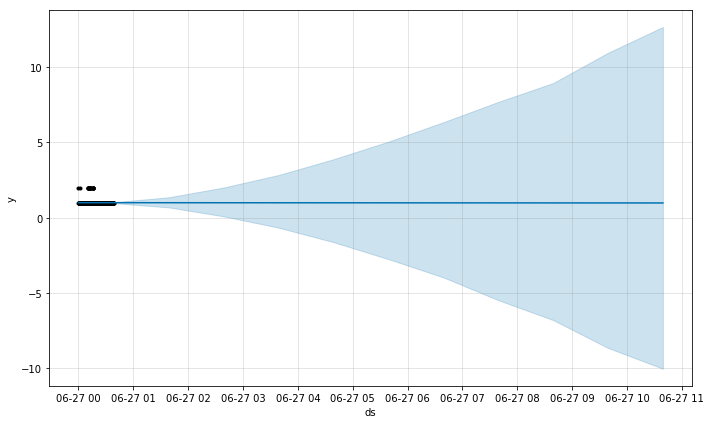

In [28]:
future = m.make_future_dataframe(periods=10, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

In [ ]:
# future=m.make_future_dataframe(periods=10)

In [30]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43235,2019-06-27 06:39:18,0.989336,-3.963355,6.346579
43236,2019-06-27 07:39:18,0.987543,-5.475103,7.694875
43237,2019-06-27 08:39:18,0.985750,-6.796617,8.946775
43238,2019-06-27 09:39:18,0.983956,-8.645903,10.958961
43239,2019-06-27 10:39:18,0.982163,-10.025290,12.668248


# 3. Exploratory data analyses (EDA) of  Santander product recommendation 

In [7]:
eda = read_csv('train_ver2.csv', nrows=10**6, encoding='utf-8')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 3.1. Cheking data

In [32]:
eda.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [33]:
eda.tail()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
999995,2015-02-28,1183296,N,ES,H,27,2013-09-25,0.0,22,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
999996,2015-02-28,1183295,N,ES,H,56,2013-09-25,0.0,22,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
999997,2015-02-28,1183294,N,ES,V,39,2013-09-25,0.0,22,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
999998,2015-02-28,1183293,N,ES,V,36,2013-09-25,0.0,22,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1
999999,2015-02-28,1183289,N,ES,H,38,2013-09-25,0.0,22,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1


In [14]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
fecha_dato               1000000 non-null object
ncodpers                 1000000 non-null int64
ind_empleado             989218 non-null object
pais_residencia          989218 non-null object
sexo                     989214 non-null object
age                      1000000 non-null object
fecha_alta               989218 non-null object
ind_nuevo                989218 non-null float64
antiguedad               1000000 non-null object
indrel                   989218 non-null float64
ult_fec_cli_1t           1101 non-null object
indrel_1mes              989218 non-null float64
tiprel_1mes              989218 non-null object
indresi                  989218 non-null object
indext                   989218 non-null object
conyuemp                 178 non-null object
canal_entrada            989139 non-null object
indfall                  989218 non-null object
tipodom                

### 3.2. Preprocessing data

#### 3.2.1. Changing type: changing nominal variable to object type

In [15]:
eda["ncodpers"]=eda["ncodpers"].astype(object)
eda["ind_nuevo"]=eda["ind_nuevo"].astype(object)
eda["indrel"]=eda["indrel"].astype(object)
eda["indrel_1mes"]=eda["indrel_1mes"].astype(object)
eda["tipodom"]=eda["tipodom"].astype(object)
eda["cod_prov"]=eda["cod_prov"].astype(object)
eda["ind_actividad_cliente"]=eda["ind_actividad_cliente"].astype(object)
ct=-1
for change in eda.columns:
    ct+=1
    if (ct>23):
        eda[change]=eda[change].astype(object)
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 48 columns):
fecha_dato               1000000 non-null object
ncodpers                 1000000 non-null object
ind_empleado             989218 non-null object
pais_residencia          989218 non-null object
sexo                     989214 non-null object
age                      1000000 non-null object
fecha_alta               989218 non-null object
ind_nuevo                989218 non-null object
antiguedad               1000000 non-null object
indrel                   989218 non-null object
ult_fec_cli_1t           1101 non-null object
indrel_1mes              989218 non-null object
tiprel_1mes              989218 non-null object
indresi                  989218 non-null object
indext                   989218 non-null object
conyuemp                 178 non-null object
canal_entrada            989139 non-null object
indfall                  989218 non-null object
tipodom                  

#### 3.2.2. Checking if there is null data

In [16]:
eda.isnull().sum()

fecha_dato                    0
ncodpers                      0
ind_empleado              10782
pais_residencia           10782
sexo                      10786
age                           0
fecha_alta                10782
ind_nuevo                 10782
antiguedad                    0
indrel                    10782
ult_fec_cli_1t           998899
indrel_1mes               10782
tiprel_1mes               10782
indresi                   10782
indext                    10782
conyuemp                 999822
canal_entrada             10861
indfall                   10782
tipodom                   10782
cod_prov                  17734
nomprov                   17734
ind_actividad_cliente     10782
renta                    175183
segmento                  10895
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             0
ind_ctop

### 3.3. Checking distribution of variables

In [18]:
category_feature = [col for col in eda.columns if
                   eda[col].dtypes=='object']
category_feature

[u'fecha_dato',
 u'ncodpers',
 u'ind_empleado',
 u'pais_residencia',
 u'sexo',
 u'age',
 u'fecha_alta',
 u'ind_nuevo',
 u'antiguedad',
 u'indrel',
 u'ult_fec_cli_1t',
 u'indrel_1mes',
 u'tiprel_1mes',
 u'indresi',
 u'indext',
 u'conyuemp',
 u'canal_entrada',
 u'indfall',
 u'tipodom',
 u'cod_prov',
 u'nomprov',
 u'ind_actividad_cliente',
 u'segmento',
 u'ind_ahor_fin_ult1',
 u'ind_aval_fin_ult1',
 u'ind_cco_fin_ult1',
 u'ind_cder_fin_ult1',
 u'ind_cno_fin_ult1',
 u'ind_ctju_fin_ult1',
 u'ind_ctma_fin_ult1',
 u'ind_ctop_fin_ult1',
 u'ind_ctpp_fin_ult1',
 u'ind_deco_fin_ult1',
 u'ind_deme_fin_ult1',
 u'ind_dela_fin_ult1',
 u'ind_ecue_fin_ult1',
 u'ind_fond_fin_ult1',
 u'ind_hip_fin_ult1',
 u'ind_plan_fin_ult1',
 u'ind_pres_fin_ult1',
 u'ind_reca_fin_ult1',
 u'ind_tjcr_fin_ult1',
 u'ind_valo_fin_ult1',
 u'ind_viv_fin_ult1',
 u'ind_nomina_ult1',
 u'ind_nom_pens_ult1',
 u'ind_recibo_ult1']

In [12]:
def bar_plot(col,data,hue=None):
    f,ax=subplots(figsize=(10,5))
    countplot(x=col,hue=hue, data=data, alpha=0.5)
    show()

#### Distribution of customers' age

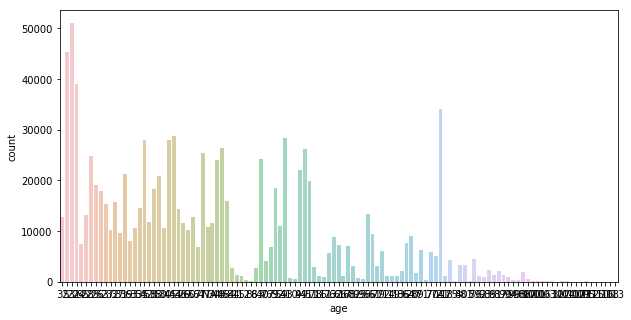

In [20]:
bar_plot(eda.age,eda)

#### Distribution of customers' employment

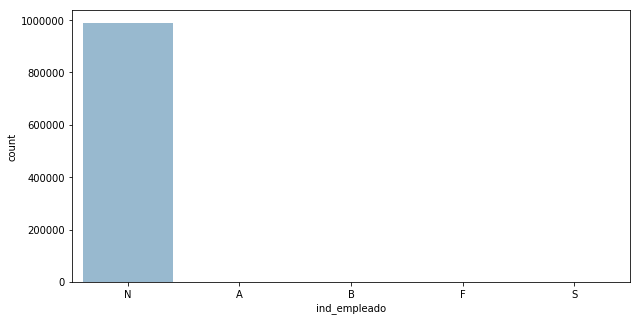

In [21]:
bar_plot(eda.ind_empleado, eda)

#### Distribution of customers' marietal status

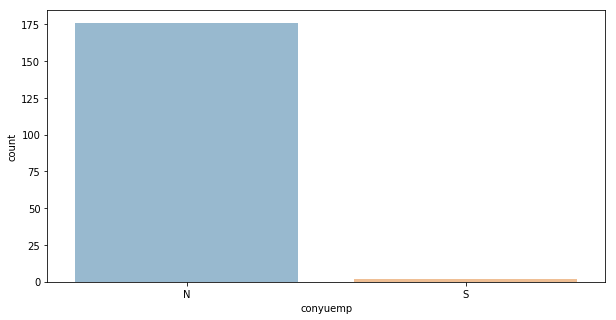

In [22]:
bar_plot(eda.columns[15], eda)

#### Customers' rank

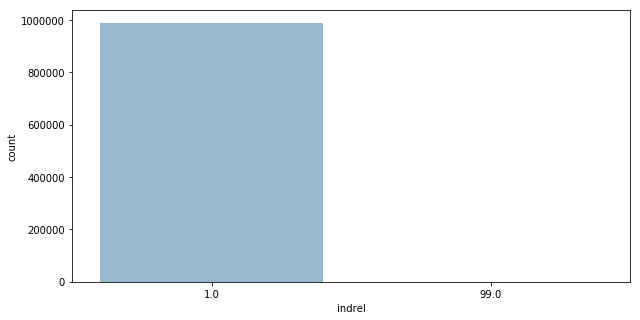

In [23]:
bar_plot(eda.columns[9], eda)

#### Distribution of customers' residence

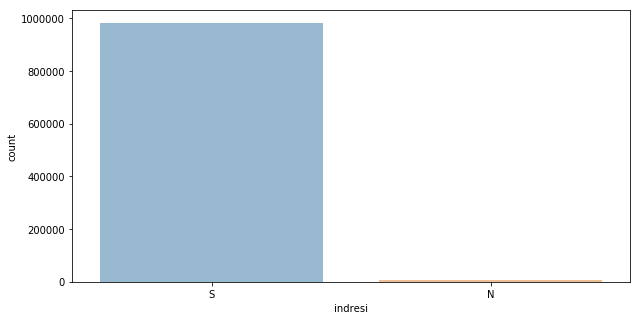

In [24]:
bar_plot(eda.columns[13], eda)

#### Distribution of customers' nationality

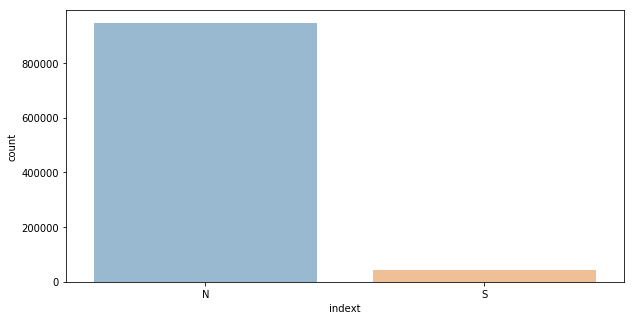

In [25]:
bar_plot(eda.columns[14], eda)

#### Distribution of product

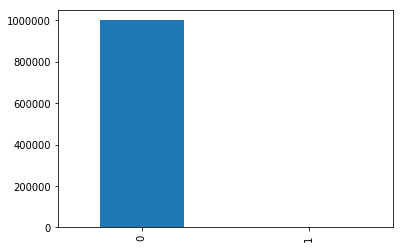

In [26]:
eda['ind_ahor_fin_ult1'].value_counts().plot(kind='bar')
show()

In [47]:
numerical_feature = [col for col in eda.columns if
                   eda[col].dtypes=='float']
numerical_feature

['renta']

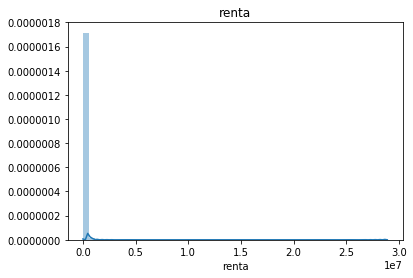

In [43]:
distplot(eda.loc[eda['renta'].notnull(), 'renta'])
title('renta')
show()

### Visualizing the correlation between variables 

In [9]:
corr=eda.corr()

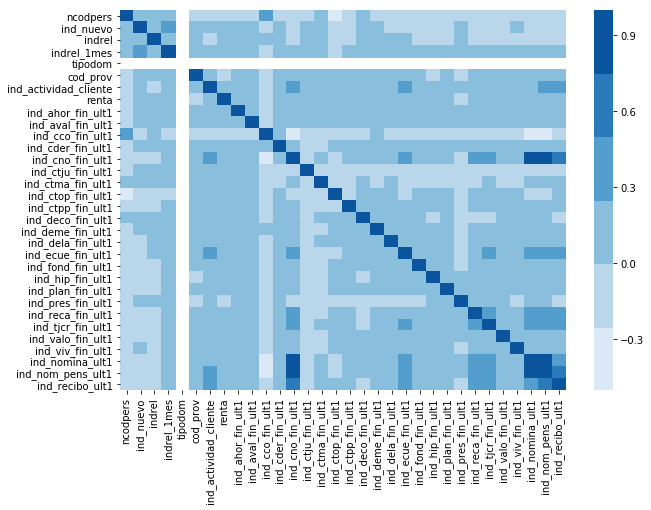

In [10]:
cmap=color_palette("Blues")
f,ax =subplots(figsize=(10,7))
heatmap(corr, cmap=cmap)